In [1]:
import pandas as pd # to load and manipulate data and for one-hot encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation 
from sklearn.metrics import confusion_matrix # to create confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw confusion matrix

In [2]:
df=pd.read_csv(r"C:\Users\Harshit\Desktop\Sem7\ML\dataset1.csv") #importing dataset

In [3]:
# print 5 rows
df.head()

,row,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Missing Data

In [4]:
df.dtypes

row            int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [5]:
df = df.drop('row', axis=1)

In [6]:
df['typea'].unique()

array([49, 55, 52, 51, 60, 62, 59, 69, 72, 65, 54, 35, 78, 61, 45, 74, 66,
       53, 56, 57, 47, 48, 70, 75, 30, 64, 46, 41, 39, 67, 68, 58, 50, 43,
       63, 34, 42, 13, 44, 77, 26, 71, 36, 37, 38, 73, 32, 33, 28, 20, 29,
       31, 25, 40], dtype=int64)

In [7]:
df['famhist'].unique()

array(['Present', 'Absent'], dtype=object)

In [8]:
df['famhist']=df['famhist'].map({'Present':1,'Absent':0})

In [9]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [10]:
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

hence **No missing value**

In [11]:
len(df)

462

## Format data part 1: split the data into dependent and independent variables

In [12]:
## MAke a new copy of the columns to make predictions 
X = df.drop('chd',axis=1).copy() 
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [13]:
y = df['chd'].copy()
y.head()

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

## Format the data part 2: One-Hot-encoding 

Now that we have split the dataframe into two pieces, X, which contains the data we will use to predict classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variables in X. The list bellow tells us what each variable represents and the type of data (float or categorical) it should contain:
    
* **sbp** systolic blood pressure **Int**
* **tobacco** Cumulative Tobacco(Kg) **Float**
* **ldl** Low density lipoprotein cholestrol **Float**
* **adiposity** measure of % body fat **float**
* **famhist** family history of heart disease **Categorical**
   * 1 = present
   * 0 = Absent
* **typea** type-A behavior is characterized by an excessive competitive drive, impatience and anger/hostility **Int**
* **obesity** measure weight-to-height rations (BMI) **float**
* **alcohol** current alcohol consumption  **float**

In [22]:
X_encoded =pd.get_dummies(X,columns=['famhist'])

X_encoded.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_0,famhist_1
0,160,12.00,5.73,23.11,49,25.30,97.20,52,0,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,0,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,0,1


***

# Build a preliminary classification tree

In [23]:
## split the data
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)

## create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

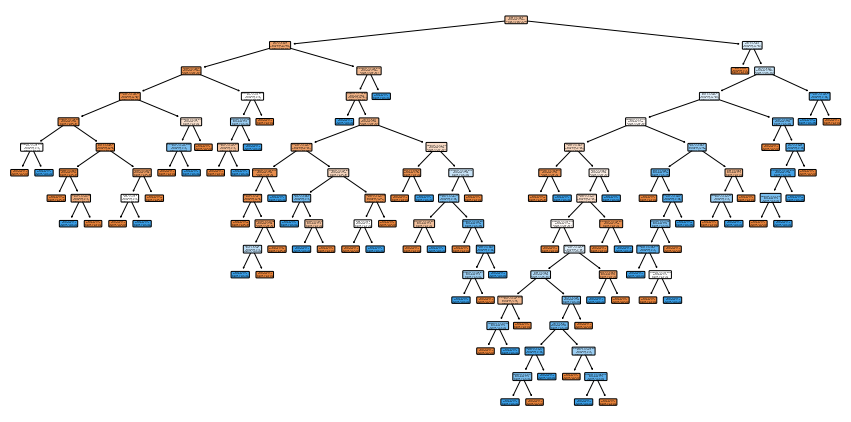

In [24]:
## Note: We can plot the tree it is huge!
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD", "Yes HD"],
         feature_names=X_encoded.columns);

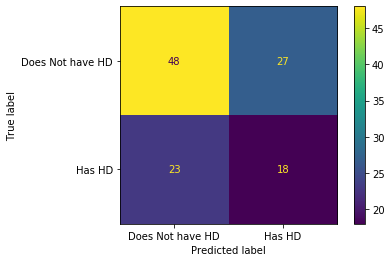

In [25]:
##plot the confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does Not have HD","Has HD"])

the confusion matrix, we see that of the 48 + 27 = 75 people that did not have Heart Disease,  (64%) were correctly classified. And of the 23+18 = 41 people that have Heart Disease,  (43%) were correctly classified. Can we do better? One thing that might be holding this Classification Tree back is that it may have overfit the training dataset. So let's prune the tree. Pruning, in theory, should solve the overfitting problem and give us better results

In [26]:
print("Accuracy on training set: {:.3f}".format(clf_dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.569


***

# Trying to optimise

## COST COMPLEXITY PRUNING PART 1: VISUALIZING ALPHA

In [30]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine the values of alpha
ccp_alphas = path.ccp_alphas # extracts different values of alpha
ccp_alphas = ccp_alphas[:-1] #excludes maximum values of alphas
print(ccp_alphas)

clf_dts = [] #creates an array that we will put decision trees into

## now create one decision tree per value of alphas and store it in array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

[0.         0.00247729 0.00262743 0.00262743 0.00264933 0.00266079
 0.00272961 0.00285112 0.00289017 0.00385356 0.00385356 0.00385356
 0.00385356 0.00392363 0.0040328  0.00425863 0.00432681 0.00433526
 0.00433526 0.00440407 0.004693   0.00481696 0.00488456 0.00488824
 0.00513809 0.00520231 0.00520231 0.00525486 0.00536746 0.00544016
 0.00753868 0.00758707 0.00826782 0.00837353 0.00905707 0.0091007
 0.00924739 0.01052065 0.01072934 0.01146676 0.01204746 0.01312246]


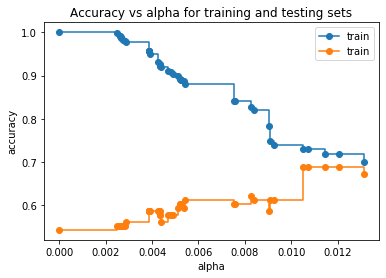

In [29]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o',label="train", drawstyle="steps-post")
ax.legend()
plt.show()

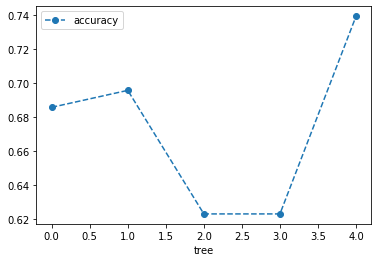

In [31]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) #create tree with tree with ccp_alpha=0.016
## Now we use 5 cross validation to create 5 differnt training and testing datasets that
## are then used to train and test the dataset of tree
## NOTE: We used 5-fold croos validation because we dont have tones of data
scores = cross_val_score(clf_dt, X_train,y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5),'accuracy': scores})

df.plot(x='tree',y='accuracy', marker='o',linestyle='--')

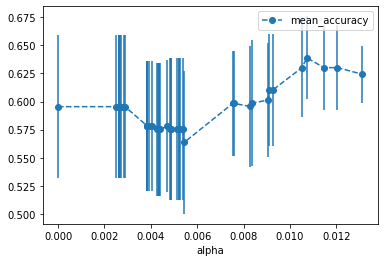

In [32]:
## create an array to score the results of each fold during cross validation
alpha_loop_values= []
## for each candidate value of alpha we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of scores for each call
## to cross_val_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])
    
##Now we can draw a graph of mean and std deviation of the scores
## for each candidate value of alpha

alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [33]:
alpha_results[(alpha_results['alpha']>0.01)&(alpha_results['alpha']<0.012)]

,alpha,mean_accuracy,std
37,0.010521,0.630186,0.044207
38,0.010729,0.638799,0.036993
39,0.011467,0.630104,0.037925


In [35]:
alpha_results[(alpha_results['alpha']>0.010521)&(alpha_results['alpha']<0.011466)]

,alpha,mean_accuracy,std
38,0.010729,0.638799,0.036993


In [38]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.010521)&(alpha_results['alpha']<0.011466)]['alpha']
ideal_ccp_alpha

38    0.010729
Name: alpha, dtype: float64

In [39]:
ideal_ccp_alpha= float(ideal_ccp_alpha)
ideal_ccp_alpha

0.010729344404847685

### Building, Evaluating, Drawing and interpreting the final classification tree

In [41]:
# Build and train a new decision tree, only this time use the optimal value of alpha

clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

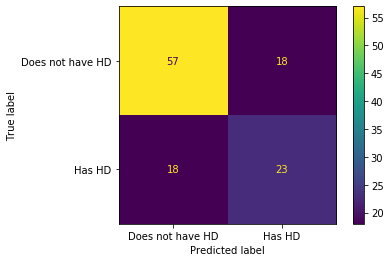

In [42]:
plot_confusion_matrix(clf_dt_pruned, X_test,y_test, display_labels=["Does not have HD","Has HD"])

We see that the pruned tree is better at classifying patient than the full sized tree.

Of the 57+18=75 people that did not have heart disease, 57 (76%) were correctly classified. This is an important improvement over the full sized tree, which only correctly classifies 31(74%) of the patients without heart disease. Of the 18+23 = 41 people with the heart disease , 23(56%) were correctly classified.

Again, this is an improvement over the full size tree, which only correctly classfied 18(43%) of the patients with the heart disease.

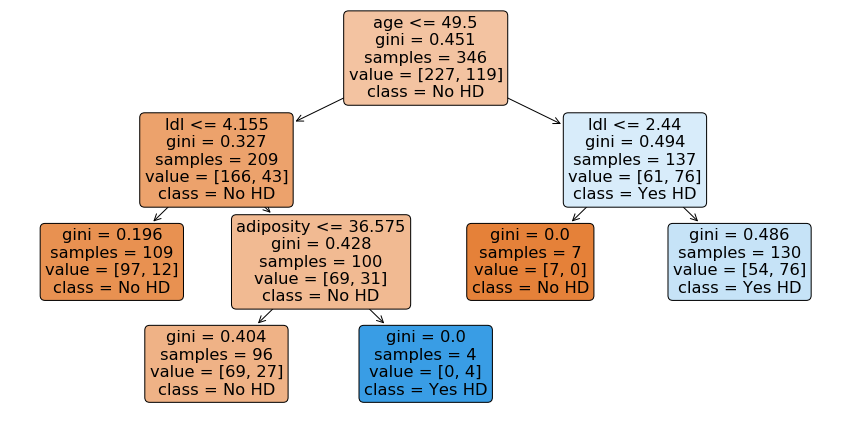

In [43]:
plt.figure(figsize =(15,7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded = True,
         class_names=["No HD","Yes HD"],
         feature_names=X_encoded.columns);